<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/estatisca_basica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estatística Básica**

Desenvolvido por: Janio de Souza Lima

Exemplos baseados em prioriatariamente no livro Estatística Básica (Toledo e Ovale, 1985) com adaptações feitas a partir dos exercícios, das funções nativas de Python e algumas bibliotecas complementares.

Quando é usado algum material complementar, sempre busquei colocar o link da fonte.

In [ ]:
from datetime import datetime
from collections import Counter
import pandas as pd

#Bibliotecas matemáticas e estatísticas
import numpy as np
from scipy.stats import spearmanr
import statistics as sts
from scipy import stats as s

#Pacotes de machine learning e estatística
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

#Bibliotecas de visualização
from matplotlib import pyplot as plt
import seaborn as sns

**Medidas de dispersão**

*Referência: TOLEDO, Geraldo Luciano e OVALLE, Ivo Izidório (1985) Estatítisca Básica. São Paulo: Atlas*

Detalhes no capítulo 5 do livro

In [ ]:
#Produção diária de dois empregados hipotéticos
empregadoA = [70, 71, 69, 70, 70]
empregadoB = [60, 80, 70, 62, 83]

In [ ]:
#Média da produção
print('Média da produção:',
      '\nEmpregado A:', np.mean(empregadoA),
      '\nEmpregado B:', np.mean(empregadoB)
      )

Média da produção: 
Empregado A: 70.0 
Empregado B: 71.0


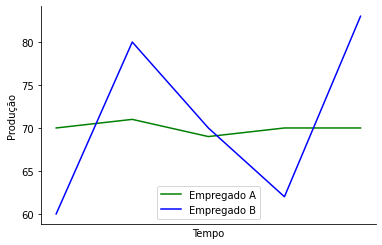

In [ ]:
plt.plot(empregadoA, color='g')
plt.plot(empregadoB, color='b')
plt.ylabel('Produção')
plt.xlabel('Tempo')
plt.xticks([])
plt.legend(['Empregado A', 'Empregado B'],
           loc='best')
sns.despine()

**Amplitude**: avalia dimensão do conjunto de dados

In [ ]:
"""
Amplitude
at = max(dados) - min(dados)
"""
at_empregadoA = max(empregadoA) - min(empregadoA)
at_empregadoB = max(empregadoB) - min(empregadoB)

print(f'Amplitude da produção dos empregados:\nA: {at_empregadoA}\nB: {at_empregadoB}')

Amplitude da produção dos empregados:
A: 2
B: 23


Desvio médio: média aritimética dos desvios em relação a uma das medidas de tendência central (média ou mediana)
* Considera diferenças absolutas
* Não é tão afetado por valores extremos com o desvio padrão
* Quando calculado em relação à mediana tende a ser bem menor do que quando o cálculo é feito em relação a qualquer outra medida de tendência central

In [ ]:
"""
Desvio médio
dm = (abs(soma(dados[k] - media) for k in dados)) / n

O mesmo cálculo poderia ser feito, substituindo a média pela mediana
Os valores de resultado seriam diferentes, mas a lógica seria similar,
considerando a distância das obsevações em relação à mediana
"""

#empregadoA = [10, 12, 13, 20, 25, 34, 45]
#empregadoB = [17, 18, 19, 20, 21, 22, 23]

#Cálculo da média e dimensão dos conjuntos de dados
mediaA = np.mean(empregadoA)
nA = len(empregadoA)

mediaB = np.mean(empregadoB)
nB = len(empregadoB)

#Cálculos dos desvios médios em 3 passos
#Cálculo da diferença entre cada observação e a média
dmA = [abs(empregadoA[k] - mediaA) for k in range(0, len(empregadoA))]
dmA = sum(dmA) #Soma das diferenças
dmA = dmA / nA #Obtenção do desvio médio

#Mesmo cálculo efetuado para o segundo conjunto de dados
dmB = [abs(empregadoB[k] - mediaB) for k in range(0, len(empregadoB))]
dmB = sum(dmB)
dmB = dmB / nB

print(f'Desvio médio da produção dos empregados:\nA: {dmA:.3f}\nB: {dmB:.3f}')

Desvio médio da produção dos empregados:
A: 0.400
B: 8.400


Outras medidas de dispersão:
* **Desvio padrão (S)**: avaliação de desvios em relação à média com base no quadrado dos desvios

In [ ]:
"""
Desvio padrão
dp = sqrt(
          (soma(dados[k] - media for k in dados) ** 2) / n
          )

sqrt => Raiz quadrada
"""
#Cálculo direto com biblioteca numpy
dpA = np.std(empregadoA)

dpAm = [(empregadoA[k] - mediaA) for k in range(0, len(empregadoA))]
dpAm = sum(dpAm) #Soma das diferenças
dpAm = dmA / nA #Obtenção do desvio médio

dpB = np.std(empregadoB)
print(f'Desvio padrão da produção dos empregados:\nA: {dpA:.3f}\nB: {dpB:.3f}')

Desvio padrão da produção dos empregados:
A: 0.632
B: 9.252


In [ ]:
#Cálculo manual

#Quadrado da diferença entre observações e a média
dpAm = [(empregadoA[k] - mediaA) ** 2 for k in range(0, len(empregadoA))]
dpBm = [(empregadoB[k] - mediaB) ** 2 for k in range(0, len(empregadoB))]

#Soma do quadrado das diferenças
dpAm = sum(dpAm)
dpBm = sum(dpBm)

#Soma dividida pela quantidade de elementos
dpAm = dpAm / nA
dpBm = dpBm / nB

#Obtenção do desvio padrão
dpAm = np.sqrt(dpAm)
dpBm = np.sqrt(dpBm)

print(dpAm,
      dpBm,
      sep='\n')

0.6324555320336759
9.252026804976301


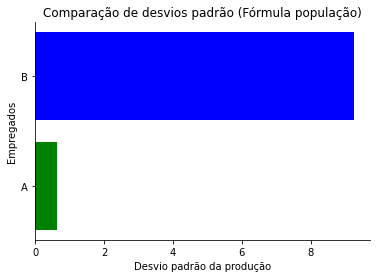

In [ ]:
plt.barh(['A', 'B'],
         [dpAm, dpBm],
         color=['g', 'b'])
plt.title('Comparação de desvios padrão (Fórmula população)')
plt.ylabel('Empregados')
plt.xlabel('Desvio padrão da produção')
sns.despine()

In [ ]:
"""
Desvio padrão para amostras
dp = sqrt(
          (soma(dados[k] - media for k in dados) ** 2) / (n - 1)
          )
O ajuste é realizado no divisor da fórmula que ao invés de n, considera n - 1
Isso ocorre para chegarmos a uma estimativa melhor do parâmetro de população.
"""

#Cálculo quando o conjunto de dados refere-se a uma amostra
#Quadrado da diferença entre observações e a média
dpAm = [(empregadoA[k] - mediaA) ** 2 for k in range(0, len(empregadoA))]
dpBm = [(empregadoB[k] - mediaB) ** 2 for k in range(0, len(empregadoB))]

#Soma do quadrado das diferenças
dpAm = sum(dpAm)
dpBm = sum(dpBm)

#Soma dividida pela quantidade de elementos
dpAm = dpAm / (nA - 1)
dpBm = dpBm / (nB - 1)

#Obtenção do desvio padrão
dpAm = np.sqrt(dpAm)
dpBm = np.sqrt(dpBm)

print(dpAm,
      dpBm,
      sep='\n')

0.7071067811865476
10.344080432788601


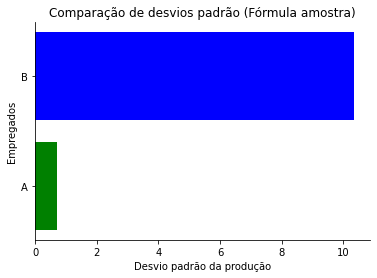

In [ ]:
plt.barh(['A', 'B'],
         [dpAm, dpBm],
         color=['g', 'b'])
plt.title('Comparação de desvios padrão (Fórmula amostra)')
plt.ylabel('Empregados')
plt.xlabel('Desvio padrão da produção')
sns.despine()

In [ ]:
#Exemplo com outro conjunto de dados
a = [10, 12, 13, 20, 25, 34, 45]

#Cálculo direto com função np da biblioteca Numpy
dp = np.std(a)

def desvio_padrao(dados, tipo=1):
  """
  Função personalizada para cálculo do desvio padrão
  dados: conjunto de dados no formato lista
  tipo:   1 -> desvio padrão da população (padrão)
          2 -> desvio padrão da amostra
  """
  n = len(dados)
  media = np.mean(dados)

  #Quadrado da diferença entre observações e a média
  dp = [(dados[k] - media) ** 2 for k in range(0, len(dados))]

  #Soma do quadrado das diferenças
  dp = sum(dp)

  #Soma dividida pela quantidade de elementos
  if tipo == 1:
    dp = dp / n
  elif tipo == 2:
    dp = dp / (n - 1)

  #Obtenção do desvio padrão
  dp = np.sqrt(dp)

  return dp

dppA = desvio_padrao(a)
dpaA = desvio_padrao(a, 2)

print(dp,
      dppA,
      dpaA,
      sep='\n')

11.996598157266867
11.996598157266867
12.957806986707354


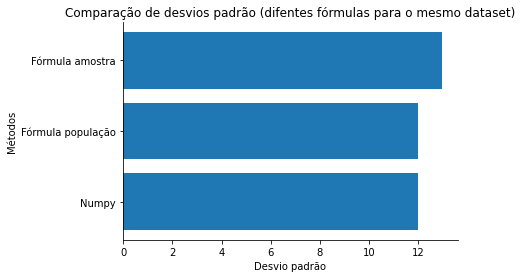

In [ ]:
plt.barh(['Numpy', 'Fórmula população', 'Fórmula amostra'],
         [dp, dppA, dpaA])
plt.title('Comparação de desvios padrão (difentes fórmulas para o mesmo dataset)')
plt.ylabel('Métodos')
plt.xlabel('Desvio padrão')
sns.despine()

Propiedades do desvio padrão:
* Adição de um número constante a cada um dos elementos do conjunto de dados o desvio padrão se mantém.
* Multiplicando ou divindo cada elmento do conjunto de dados com um número constante o desvio padrão fica multiplicado ou dividido, respectivamente, por este mesmo número.

**Variância (S²)**

Quadrado do desvio padrão

In [ ]:
"""
Variância
Como ela refere-se ao quadrado do desvio padrão, basta usar a fórmula do desvio
sem realizar a extração da raiz quadrada
"""
def variancia(dados, tipo=1):
  """
  dados: conjunto de dados no formato lista
  tipo:   1 -> desvio padrão da população (padrão)
          2 -> desvio padrão da amostra
  """
  n = len(dados)
  media = np.mean(dados)

  #Quadrado da diferença entre observações e a média
  s2 = [(dados[k] - media) ** 2 for k in range(0, len(dados))]

  #Soma do quadrado das diferenças
  s2 = sum(s2)

  #Soma dividida pela quantidade de elementos
  #Resulta na variância
  if tipo == 1:
    s2 = s2 / n
  elif tipo == 2:
    s2 = s2 / (n - 1)

  return s2

varA = variancia(empregadoA)
varB = variancia(empregadoB)

print(f'Variância da produção dos empregados:\nA: {varA:.3f}\nB: {varB:.3f}')

Variância da produção dos empregados:
A: 0.400
B: 85.600


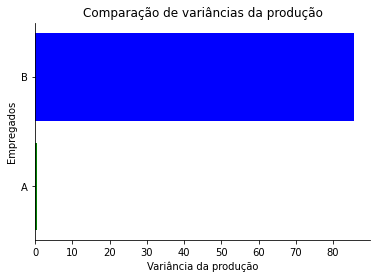

In [ ]:
plt.barh(['A', 'B'],
         [varA, varB],
         color=['g', 'b'])
plt.title('Comparação de variâncias da produção')
plt.ylabel('Empregados')
plt.xlabel('Variância da produção')
sns.despine()

In [ ]:
#Variância calculada com numpy
print(np.var(empregadoA),
      np.var(empregadoB),
             sep='\n')

0.4
85.6


Propriedades da variância:
* Primeiras duas propriedades do desvio padrão tem aplicação análoga para variância (adição/subrtação e multiplicação/divisão).
* Variância combinada

OBSERVAÇÕES:
Verificar:
- Correção de Sheppard para a variância para observar tratamento de distorções que podem ocorrer no cálculo em dados agrupados em classes de freqência em função da dispersão dos dados em cada classe.
- Controle de Charlier para conferência da exatidão de cálculos de média, variância e desvio padrão

**Coeficiente de variação de Pearson**

CVp = (S / media) * 100

In [ ]:
cvpA = (dpA / mediaA) * 100
cvpB = (dpB / mediaB) * 100

print('Coeficiente de variação de Pearson da produção dos empregados:')
print(f'A: {cvpA:.2f}%\nB: {cvpB:.2f}%')

Coeficiente de variação de Pearson da produção dos empregados:
A: 0.90%
B: 13.03%


**Coeficiente de variação de Thorndike**

CVt = (S / mediana) * 100

In [ ]:
cvtA = (dpA / np.median(empregadoA)) * 100
cvtB = (dpB / np.median(empregadoB)) * 100

print('Coeficiente de variação de Thorndike da produção dos empregados:')
print(f'A: {cvtA:.2f}%\nB: {cvtB:.2f}%')

Coeficiente de variação de Thorndike da produção dos empregados:
A: 0.90%
B: 13.22%


***Números índices***

Este conceito do ponto de vista de cálculos é simples, mas trabalhoso, por isso o foco do estudo recomendado é mais a leitura do capítulo do livro para entendimento.

Referência: TOLEDO, Geraldo Luciano e OVALLE, Ivo Izidório (1985) Estatítisca Básica. São Paulo: Atlas

Detalhes no capítulo 7 do livro

Propriedades de números índices:
* Identidade: o número-índice deve ser igual à unidade quando a época dada (t) coincidir com a época básica (0).
* Reversão (inversão) de tempo: se permutarem dois períodos s e t, os resultados são o inverso um do outro.
* Circular: "considerando um índice em que as datas aparecem em progressão aritimética e cujas comparações foram feitas com base nas datas imediatamente anteriores, o valor do índice da última data, com base na primeira, será igual ao produto dos valores da série original" (Toledo e Ovale, 1985)

In [ ]:
#Mudança de base
anos = list(range(1957, 1969))
ind_producao_industrial = [100, 104, 97, 112, 120, 124,
                           134, 125, 139, 143, 143, 134]
base = 1957

print(f'Série original - Base: ano {base}')
print('Ano ', 'Índice', sep=' : ')
for k in range(0, len(anos)):
  print(anos[k],
        ind_producao_industrial[k],
        sep=' : ')

Série original - Base: ano 1957
Ano  : Índice
1957 : 100
1958 : 104
1959 : 97
1960 : 112
1961 : 120
1962 : 124
1963 : 134
1964 : 125
1965 : 139
1966 : 143
1967 : 143
1968 : 134


In [ ]:
#Definição da nova base de referência dos índices
nova_base = 1961
posicao_nb = anos.index(nova_base)
posicao_nb

4

In [ ]:
print(anos[posicao_nb],
      ind_producao_industrial[posicao_nb]
)

1961 120


In [ ]:
val_novaBase = ind_producao_industrial[posicao_nb]
val_novaBase

120

In [ ]:
"""
Para manuntenção da coerência dos índices esta forma de ajuste só é válida
quando o método de cálculo original dos número-índice respeita a terceira
proprieda (Circular) de números-índices
"""
novos_indices = [round((ind_producao_industrial[k] / val_novaBase) * 100) for
                 k in range(0, len(anos))]
novos_indices

[83, 87, 81, 93, 100, 103, 112, 104, 116, 119, 119, 112]

In [ ]:
print(f'Série ajustada - Base: ano {nova_base}')
print('Ano ', 'Índice', sep=' : ')
for k in range(0, len(anos)):
  print(anos[k],
        novos_indices[k],
        sep=' : ')

Série ajustada - Base: ano 1961
Ano  : Índice
1957 : 83
1958 : 87
1959 : 81
1960 : 93
1961 : 100
1962 : 103
1963 : 112
1964 : 104
1965 : 116
1966 : 119
1967 : 119
1968 : 112


In [ ]:
anos_serie1 = list(range(1970, 1976))
anos_serie2 = list(range(1975, 1981))

serie1 = [100, 90, 108, 160, 196, 200]
serie2 = [100, 120, 160, 210, 240, 250]

print('Série 1')
print('Ano ', 'Índice', sep=' : ')
for k in range(0, len(serie1)):
  print(anos_serie1[k],
        serie1[k],
        sep=' : ')

Série 1
Ano  : Índice
1970 : 100
1971 : 90
1972 : 108
1973 : 160
1974 : 196
1975 : 200


In [ ]:
print('Série 2')
print('Ano ', 'Índice', sep=' : ')
for k in range(0, len(serie2)):
  print(anos_serie2[k],
        serie2[k],
        sep=' : ')

Série 2
Ano  : Índice
1975 : 100
1976 : 120
1977 : 160
1978 : 210
1979 : 240
1980 : 250


In [ ]:
#Ajuste
#Série novas é mantida inalterada
#Série 1 é ajustada com base no ano/período de encontro das duas séries (1975)
serie1N = [round(serie1[k] / serie1[-1] * serie2[0]) for
           k in range(0, len(serie1))]
serie1N

[50, 45, 54, 80, 98, 100]

In [ ]:
anos_serieN = list(range(1970, 1981))
serieN = serie1N[:-1] + serie2


print('Série Completa')
print('Ano ', 'Índice', sep=' : ')
for k in range(0, len(serieN)):
  print(anos_serieN[k],
        serieN[k],
        sep=' : ')

Série Completa
Ano  : Índice
1970 : 50
1971 : 45
1972 : 54
1973 : 80
1974 : 98
1975 : 100
1976 : 120
1977 : 160
1978 : 210
1979 : 240
1980 : 250


**Deflatores e poder aquisitivo**

In [ ]:
anos = list(range(1975, 1981))
faturamento = [1600000,
               1800000,
               2400000,
               2800000,
               3000000,
               3200000]
indice_precos = [100, 120, 150, 160, 180, 187]

print('Faturamento - Valores nominais')
print('Ano ',
      'Valor  ',
      'Índice de Preços',
      sep=' : ')

for k in range(0, len(anos)):
  print(anos[k],
        faturamento[k],
        indice_precos[k],
        sep=' : ')

Faturamento - Valores nominais
Ano  : Valor   : Índice de Preços
1975 : 1600000 : 100
1976 : 1800000 : 120
1977 : 2400000 : 150
1978 : 2800000 : 160
1979 : 3000000 : 180
1980 : 3200000 : 187


In [ ]:
"""
Calculando preço deflacionado
Definido o ano base para deflacionamento, fazemos o seguinte:
* (valor / indice_atual) * indice_base:
  valor = valor a ser deflacionado
  indice_atual = indice do período relativo ao valor a ser deflacionado
  indice_base = indice do período escolhido como base
"""
fat_deflacionado = [(faturamento[k] / indice_precos[k]) * indice_precos[0] for
    k in range(0, len(anos))]

print(f'Faturamento - Falores deflacionados com base em {indice_precos[0]}')
print('Ano ',
      'Valor  ',
      'Índice de Preços',
      sep=' : ')

for k in range(0, len(anos)):
  print(anos[k],
        round(fat_deflacionado[k]),
        indice_precos[k],
        sep=' : ')

Faturamento - Falores deflacionados com base em 100
Ano  : Valor   : Índice de Preços
1975 : 1600000 : 100
1976 : 1500000 : 120
1977 : 1600000 : 150
1978 : 1750000 : 160
1979 : 1666667 : 180
1980 : 1711230 : 187


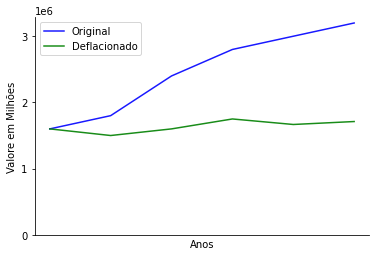

In [ ]:
plt.plot(faturamento, color='b', alpha=0.9)
plt.plot(fat_deflacionado, color='g', alpha=0.9)
plt.legend(['Original', 'Deflacionado'])
plt.yticks([0, 1000000, 2000000, 3000000])
plt.xticks([])
plt.title('')
plt.ylabel('Valore em Milhões')
plt.xlabel('Anos')
sns.despine()

In [ ]:
"""
Cálculo de evolução real do faturamento
Definido o ano base para deflacionamento, fazemos o seguinte:
* (valor_atual_deflacionado / valor base) * 100
"""
evolucao_real = [fat_deflacionado[k] / fat_deflacionado[0] * 100 for
                k in range(0, len(anos))]

evolucao_real

[100.0, 93.75, 100.0, 109.375, 104.16666666666667, 106.951871657754]

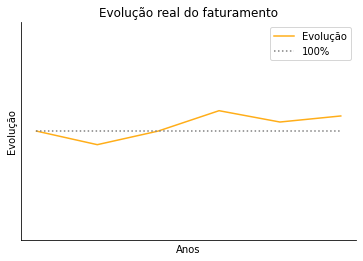

In [ ]:
plt.plot(evolucao_real, color='orange', alpha=0.9)
plt.plot([100 for k in range(0, len(anos))], color='gray', ls=':')
plt.legend(['Evolução', '100%'])
plt.ylim((50, 150))
plt.yticks([])
plt.xticks([])
plt.title('')
plt.title('Evolução real do faturamento')
plt.ylabel('Evolução')
plt.xlabel('Anos')
sns.despine()

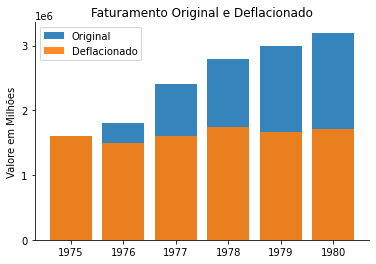

In [ ]:
plt.bar(anos, height=faturamento, alpha=0.9)
plt.bar(anos, fat_deflacionado, alpha=0.9)
plt.legend(['Original', 'Deflacionado'])
plt.yticks([0, 1000000, 2000000, 3000000])
plt.title('Faturamento Original e Deflacionado')
plt.ylabel('Valore em Milhões')
sns.despine()

**Correlação e regressão**

Referência: TOLEDO, Geraldo Luciano e OVALLE, Ivo Izidório (1985) Estatítisca Básica. São Paulo: Atlas

Detalhes no capítulo 8 do livro


Correlação linear simples
* Relação entre variáveis X e Y através da disposição dos pontos (X, Y) em torno de uma reta
* Faixa de valores -1 e 1

In [ ]:
"""
r = (XYX) / sqrt(SXX SYY)
rXY = (
  soma(XY) - (soma(X) * soma(Y)) / n)
  /
  sqrt(
    abs(
      soma(X ** 2)
      -
      (soma(X)) ** 2 / n
      )
    *
    abs(
      soma(Y ** 2)
      -
      (soma(Y)) ** 2 / n
      )
    )

Faturamento - Valores nominais
Ano  : Valor   : Índice de Preços
1975 : 1600000 : 100
1976 : 1800000 : 120
1977 : 2400000 : 150
1978 : 2800000 : 160
1979 : 3000000 : 180
1980 : 3200000 : 187


Faturamento - Falores deflacionados com base em 100
Ano  : Valor   : Índice de Preços
1975 : 1600000 : 100
1976 : 1500000 : 120
1977 : 1600000 : 150
1978 : 1750000 : 160
1979 : 1666667 : 180
1980 : 1711230 : 187
"""
faturamento = pd.Series([1600000,
               1800000,
               2400000,
               2800000,
               3000000,
               3200000])

indice_precos = [100, 120, 150, 160, 180, 187]

fat_deflacionado = [(faturamento[k] / indice_precos[k]) * indice_precos[0] for
    k in range(0, len(faturamento))]

fat_deflacionado = pd.Series(fat_deflacionado)

In [ ]:
#Calcular a correção com base função embutida de Seires da biblioteca Pandas
print('Correlação entre faturamento e faturamento deflacionado:',
      faturamento.corr(fat_deflacionado),
      sep='\n')

Correlação entre faturamento e faturamento deflacionado:
0.7938022410213701


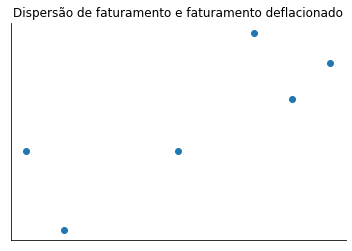

In [ ]:
plt.scatter(faturamento,
            fat_deflacionado)
plt.title('Dispersão de faturamento e faturamento deflacionado')
plt.xticks([])
plt.yticks([])
sns.despine()

Tipos de correlação linear:
* Correlação positiva: quando valores crescentes de X correspondem a valores crescentes de Y
* Perfeita positiva: quando além de crescentes, os pontos (X, Y) estão perfeitamente alinhados, rXY = 1
* Correlação negativa: quando valores crescentes de Y correspondem a valores decrescentes de Y
* Perfeita negativa: quando além de decrescentes, os pontos (X, Y) estão perfeitamente alinhados, rXY = -1
* Correlação nula: quando não houver relação entre X e Y
* ***Correlação espúria***: quando variáveis X e Y POSSUÍREM CORRELAÇÃO, mesmo sendo INDEPENDENTES entre si.

In [ ]:
"""
Exemplo
Dados socio-econômicos de famílias
"""
colunas = ['FAMILIA', 'RENDA', 'POUPANCA', 'FILHOS', 'ANOS_ESTUDO']

familias = pd.DataFrame({'d1': list('ABCDEFGHIJ'),
                        'd2': [10, 15, 12, 70, 80,
                               100, 20, 30, 10, 60],
                        'd3': [4, 7, 5, 20, 20,
                               30, 8, 8, 3, 15],
                        'd4': [8, 6, 5, 1, 2,
                               2, 3, 2, 6, 1],
                        'd5': [3, 4, 5, 12, 16,
                               18, 8, 8, 4, 8]
                         })
familias.columns = colunas

familias

,FAMILIA,RENDA,POUPANCA,FILHOS,ANOS_ESTUDO
0,A,10,4,8,3
1,B,15,7,6,4
2,C,12,5,5,5
3,D,70,20,1,12
4,E,80,20,2,16
5,F,100,30,2,18
6,G,20,8,3,8
7,H,30,8,2,8
8,I,10,3,6,4
9,J,60,15,1,8


In [ ]:
familias.describe()

,RENDA,POUPANCA,FILHOS,ANOS_ESTUDO
count,10.000000,10.000000,10.000000,10.000000
mean,40.700000,12.000000,3.600000,8.600000
std,33.671782,8.894443,2.458545,5.189733
min,10.000000,3.000000,1.000000,3.000000
25%,12.750000,5.500000,2.000000,4.250000
50%,25.000000,8.000000,2.500000,8.000000
75%,67.500000,18.750000,5.750000,11.000000
max,100.000000,30.000000,8.000000,18.000000


In [ ]:
#Cálculo da correlação
corr1 = familias['RENDA'].corr(familias['POUPANCA'])
corr2 = familias['RENDA'].corr(familias['FILHOS'])
corr3 = familias['RENDA'].corr(familias['ANOS_ESTUDO'])

print(corr1, corr2, corr3)

0.9835181477979665 -0.7586043877252923 0.947271146722697


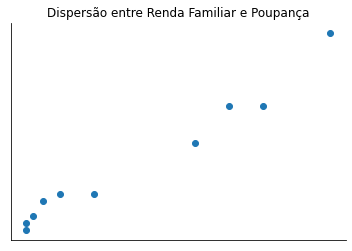

In [ ]:
#Demonstração gráfica
plt.scatter(familias['RENDA'],
            familias['POUPANCA'])
plt.title('Dispersão entre Renda Familiar e Poupança')
plt.xticks([])
plt.yticks([])
sns.despine()

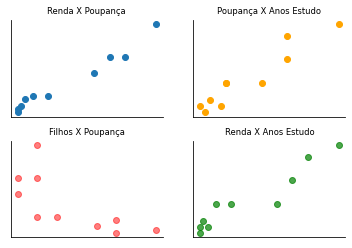

In [ ]:
"""
Análise dos dados de exemplo em um visual de dashboard
"""
#Plotando um gráfico na primeira área do painel
#Criando área do painel
fig, axes = plt.subplots(2, 2)

#Plotando primeiro gráfico
axes[0, 0].scatter(familias['RENDA'],
            familias['POUPANCA'])
axes[0, 0].set_title('Renda X Poupança', fontsize='small')
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])

#Plotando segundo gráfico
axes[0, 1].scatter(familias['POUPANCA'], familias['ANOS_ESTUDO'],
                   color='orange')
axes[0, 1].set_title('Poupança X Anos Estudo', fontsize='small')
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])

#Plotando terceiro gráfico
axes[1, 0].scatter(familias['FILHOS'], familias['POUPANCA'],
                   color='r', alpha=0.5)
axes[1, 0].set_title('Filhos X Poupança', fontsize='small')
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])

#Plotando quarto gráfico
axes[1, 1].scatter(familias['RENDA'], familias['ANOS_ESTUDO'],
                   color='g', alpha=0.7)
axes[1, 1].set_title('Renda X Anos Estudo', fontsize='small')
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])

#Ajutes gerais
sns.despine()
plt.subplots_adjust(hspace=0.25)

**Correlação Ordinal** (Coeficiente de Spearman)

Considera as posições que valores das variáveis ocupam qunado ordenados na forma crescente ou decrescente

In [ ]:
"""
Coeficiente de Spearman
rs = 1 - ((6 * soma(dj ** 2)) / (n(n ** 2 - 1)))
Onde:
dj = diferença entre um i-ésimo par
n = observações
"""
#Cálculo a partir da função da biblioteca scipy módulo stats
spearmanr(familias['RENDA'], familias['POUPANCA'])

SpearmanrResult(correlation=0.990830321206772, pvalue=3.059198730818556e-08)

In [ ]:
s = spearmanr(familias['RENDA'], familias['POUPANCA'])[0]
s

0.990830321206772

In [ ]:
"""
Exemplo
Classificação em uma avaliação e QI
"""
avaliacao = pd.DataFrame({'NOME': list('ABCDEFGHIJKL'),
                        'RANK': [5, 2, 6, 1, 8, 9, 7, 3, 11, 10, 12, 4],
                        'QI': [100, 90, 80, 130, 100,
                               100, 110, 120, 90, 120, 110, 140],
                         })

avaliacao

,NOME,RANK,QI
0,A,5,100
1,B,2,90
2,C,6,80
3,D,1,130
4,E,8,100
5,F,9,100
6,G,7,110
7,H,3,120
8,I,11,90
9,J,10,120


In [ ]:
spearmanr(avaliacao['RANK'], avaliacao['QI'])

SpearmanrResult(correlation=-0.23718634595814242, pvalue=0.4579244330327443)

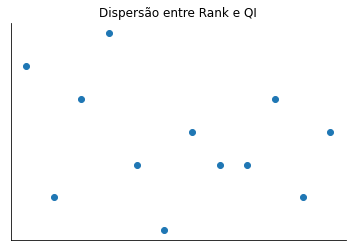

In [ ]:
#Demonstração gráfica
plt.scatter(avaliacao['RANK'], avaliacao['QI'])
plt.title('Dispersão entre Rank e QI')
plt.xticks([])
plt.yticks([])
sns.despine()

In [ ]:
"""
Exemplo
Inflação e custo importação de petróleo
"""
datas = pd.date_range('1978-04-01', periods=12, freq='BM')
petroleo = pd.DataFrame({'DATA': datas,
                        'INFLACAO': [100., 103.2, 107.4, 111.3, 114., 116.3,
                                     119.3, 122.2, 124.2, 129.9, 135.5, 141.6],
                        'CUSTO_PETROLEO': [19656,
                                           19391,
                                           20262,
                                           20000,
                                           20149,
                                           20581,
                                           20937,
                                           21273,
                                           22517,
                                           20560,
                                           21236,
                                           20471]})

petroleo

,DATA,INFLACAO,CUSTO_PETROLEO
0,1978-04-28,100.0,19656
1,1978-05-31,103.2,19391
2,1978-06-30,107.4,20262
3,1978-07-31,111.3,20000
4,1978-08-31,114.0,20149
5,1978-09-29,116.3,20581
6,1978-10-31,119.3,20937
7,1978-11-30,122.2,21273
8,1978-12-29,124.2,22517
9,1979-01-31,129.9,20560


In [ ]:
len(datas)

12

In [ ]:
print('Coeficiente de correlação (Pearson | Spearman):',
      petroleo['INFLACAO'].corr(petroleo['CUSTO_PETROLEO']),
      spearmanr(petroleo['INFLACAO'], petroleo['CUSTO_PETROLEO'])[0],
      sep='\n')

Coeficiente de correlação (Pearson | Spearman):
0.5751259466506365
0.7202797202797203


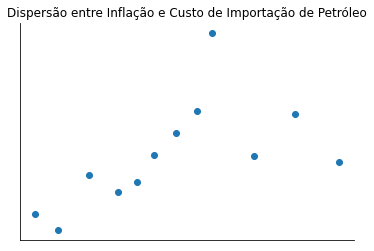

In [ ]:
#Demonstração gráfica
plt.scatter(petroleo['INFLACAO'], petroleo['CUSTO_PETROLEO'])
plt.title('Dispersão entre Inflação e Custo de Importação de Petróleo')
plt.xticks([])
plt.yticks([])
sns.despine()

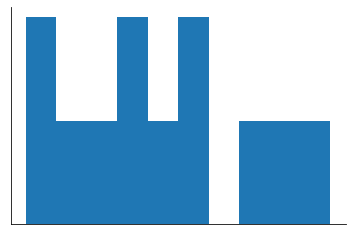

In [ ]:
#Distribuição dos preços e da inflação
plt.hist(petroleo['INFLACAO'])
#plt.title('Dispersão entre Inflação e Custo de Importação de Petróleo')
plt.xticks([])
plt.yticks([])
sns.despine()

***Regressão Linear Simples***

Descreve através de um modelo matemático a relação entre duas variáveis (x, Y).

Y = f(x)

Onde:
* Y => Variável explicada (variável aleatória)
* x => Variável explicada

Considerando que Y pode receber influências de outras variáveis, a relação direta de x e y pode não explicar todos os fenômenos, por isso a fórmula ajuda é: Y = f(x) + e

Onde:
* e => Capta as influências sobre Y não devidas a x.

In [ ]:
#Fonte complementar de estudo:
#https://sigmoidal.ai/como-implementar-regressao-linear-com-python/

x = np.array(petroleo['INFLACAO'])
y = np.array(petroleo['CUSTO_PETROLEO'])

# criar modelo linear e otimizar
lm_model = LinearRegression(normalize=True) #Verificar diferença sem normalizar
lm_model.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
"""
Cálculo da reta de ajustamento
Ŷ = a + bX
Onde:
a e b: Parâmetros do modelo
a => Ponto onde a reta ajustada corta o eixo Y
b => Tangente do ângulo que a reta forma com uma paralelo do eixo X (inclinação)
"""
# extrair coeficientes
slope = lm_model.coef_
intercept = lm_model.intercept_

In [ ]:
# imprimir os valores encontrados para os parâmetros
print(f'a - interseção: \t{format(intercept)}')
print(f'b - inclinação: \t{format(slope[0])}')
print(f'Equação: \t\tŶ = {intercept} + {slope[0]} * X')

a - interseção: 	16090.52693147085
b - inclinação: 	37.859973908589936
Equação: 		Ŷ = 16090.52693147085 + 37.859973908589936 * X


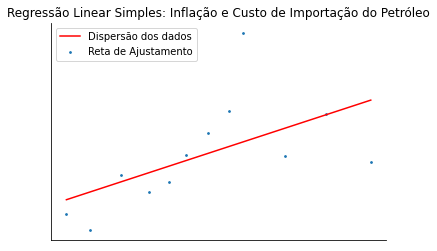

In [ ]:
# plotar pontos e retas com parâmetros otimizados
plt.scatter(x, y, s=3)
plt.plot(x, (x * slope + intercept), color='r')
plt.legend(['Dispersão dos dados', 'Reta de Ajustamento'])
plt.title(
    'Regressão Linear Simples: Inflação e Custo de Importação do Petróleo')
plt.xticks([])
plt.yticks([])
sns.despine()

In [ ]:
"""
Exemplo
Produção de leite em relação com preciptação pluviométrica
"""
anos = pd.date_range('2010-12-31', periods=10, freq='Y')
leite = pd.DataFrame({'ANO': anos,
                      'PROD_LEITE': [26, 25, 31, 29, 27, 31, 32, 28, 30, 30],
                      'IND_PLUVIO': [23, 21, 28, 27, 23, 28, 27, 22, 26, 25]})
leite

,ANO,PROD_LEITE,IND_PLUVIO
0,2010-12-31,26,23
1,2011-12-31,25,21
2,2012-12-31,31,28
3,2013-12-31,29,27
4,2014-12-31,27,23
5,2015-12-31,31,28
6,2016-12-31,32,27
7,2017-12-31,28,22
8,2018-12-31,30,26
9,2019-12-31,30,25


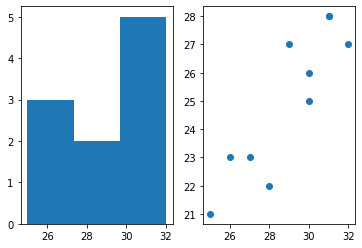

In [ ]:
#Visualização dos dados
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(leite['PROD_LEITE'], bins=3)
ax2.scatter(leite['PROD_LEITE'], leite['IND_PLUVIO'])

In [ ]:
#Transformando dados do data frame em arrays
x = np.array(leite['IND_PLUVIO'])
y = np.array(leite['PROD_LEITE'])

In [ ]:
#Criação do modelo
lm_model = LinearRegression(normalize=True)
lm_model.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
#Recuperação dos parâmetros para reta de ajustamento
inclinacao = lm_model.coef_
intersecao = lm_model.intercept_

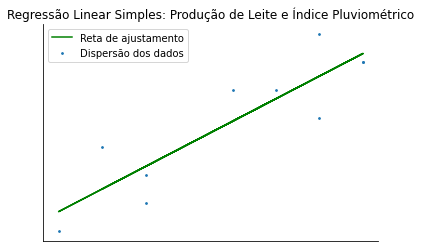

In [ ]:
plt.scatter(x, y, s=3)
plt.plot(x, (x * inclinacao + intersecao), 'g')
plt.title('Regressão Linear Simples: Produção de Leite e Índice Pluviométrico')
plt.legend(['Reta de ajustamento', 'Dispersão dos dados'])
plt.yticks([])
plt.xticks([])
sns.despine()

In [ ]:
"""
Cálculo da reta de ajustamento
Ŷ = a + bX
Onde:
a e b: Parâmetros do modelo
a => Ponto onde a reta ajustada corta o eixo Y
b => Tangente do ângulo que a reta forma com uma paralelo do eixo X (inclinação)
"""

print(f'Equação: Ŷ = a + bX = {intersecao} + {inclinacao[0]} * X')

Equação: Ŷ = a + bX = 8.899999999999999 + 0.8 * X


In [ ]:
#Aplicação manual do modelo
x_conhecido = 24
y_previsto = intersecao + inclinacao[0] * x_conhecido
y_previsto

28.1

In [ ]:
#Função manual para aplicação do modelo
def previsao(x_conhecido):
  y_previsto = intersecao + inclinacao[0] * x_conhecido
  return y_previsto

previsto = previsao(x_conhecido)
previsto

28.1

In [ ]:
"""
Aplicação do modelo para previsão automática
Referência complementar:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

#Antes de aplicar o método predict é necessário converter o valor em np.array,
tendo em vista que o modelo precisa receber uma array para realizar o
processamento
"""
#Transformação do x em array
x_conhecido = np.array(x_conhecido)

#Previsão
lm_model.predict(x_conhecido.reshape(-1, 1))

array([28.1])

***R² Coeficiente de determinação***

Poder explicativo do modelo

In [ ]:
"""
R² = (b * (SYX)) / (SYY)
Onde:
SYX = soma(X * Y) - (((soma(X)) * (soma(Y))) / n)
SYY = soma(Y ** 2) - (soma(Y) ** 2 / n)
"""
r2 = lm_model.score(x.reshape(-1, 1), y)
print(f'R² do modelo: {r2:.3f}')

R² do modelo: 0.785


In [ ]:
emprestimos = pd.read_csv('loan.csv', low_memory=False)

In [ ]:
emprestimos.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [ ]:
emprestimos.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
emprestimos['loan_amnt'] = emprestimos['loan_amnt'].fillna(0)
emprestimos['annual_inc'] = emprestimos['annual_inc'].fillna(0)

In [ ]:
y = np.array(emprestimos['annual_inc'])
x = np.array(emprestimos['loan_amnt'])
print(y,
      x)

[24000. 30000. 12252. ... 28000. 65000.     0.] [ 5000.  2500.  2400. ...  1800. 25000.     0.]


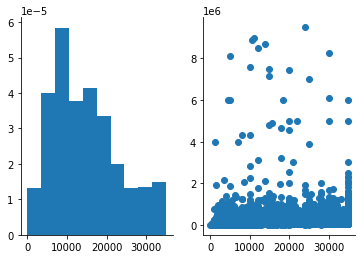

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(x, density=True)
ax2.scatter(x, y)
sns.despine()

In [ ]:
#Criação do modelo
lm_model = LinearRegression(normalize=True)
lm_model.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
#Recuperação do parâmetros
a = lm_model.intercept_ #Interseção do eixto y
b = lm_model.coef_ #Inclinação em relação ao eixo x

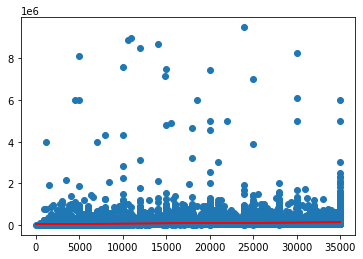

In [ ]:
plt.scatter(x, y)
plt.plot(x, (x * b + a), 'r')

In [ ]:
emprestimos['annual_inc'].corr(emprestimos['loan_amnt'])

0.3286085847247867

In [ ]:
r2 = lm_model.score(x.reshape(-1, 1), y)

print(f'R² do modelo: {r2:.3f}')

R² do modelo: 0.108


Tanto pela análise da regressão linear quanto pelo cálculo da correlação não é possível fazer uma relação direta entre as duas variáveis analisadas.

Essa visão é complementada pelo baixo coeficiente de determinação (r²).

***Regressão polinomial***

In [ ]:
"""
Referência complementar:
https://www.it-swarm.dev/pt/python/regressao-polinomial-multivariada-com-numpy/1066620986/
"""
#X is the independent variable (bivariate in this case)
X = np.array([[0.44, 0.68], [0.99, 0.23]])

#vector is the dependent data
vector = [109.85, 155.72]

#predict is an independent variable for which we'd like to predict the value
predict = np.array([[0.49, 0.18]])

In [ ]:
#generate a model of polynomial features
poly = PolynomialFeatures(degree=2)

#transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
X_ = poly.fit_transform(X)

#transform the prediction to fit the model type
predict_ = poly.fit_transform(predict)

#here we can remove polynomial orders we don't want
#for instance I'm removing the `x` component
X_ = np.delete(X_,(1),axis=1)
predict_ = np.delete(predict_,(1),axis=1)

#generate the regression object
clf = LinearRegression()
#preform the actual regression
clf.fit(X_, vector)

print("X_ = ",X_)
print("predict_ = ",predict_)
print("Prediction = ",clf.predict(predict_))

X_ =  [[1.     0.68   0.1936 0.2992 0.4624]
 [1.     0.23   0.9801 0.2277 0.0529]]
predict_ =  [[1.     0.18   0.2401 0.0882 0.0324]]
Prediction =  [130.74513479]


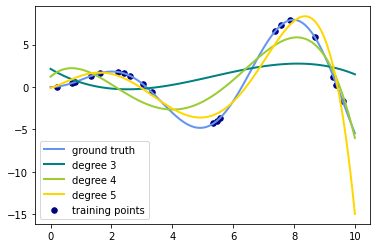

In [ ]:
"""
Verificar exemplo da documentação oficial
https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html
"""
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

In [ ]:
#Adaptação
gasolina = pd.DataFrame({'Data': pd.date_range('2019-08-01',
                                               periods=7,
                                               freq='BM'),
                         'Preco': np.array([4.5, 4.99, 5.3, 5.6, 4.8, 6., 6.5])})
                      #'Preco': np.array([6., 6.3, 7.3, 9.6, 10.2, 22.6, 38.])})

gasolina

,Data,Preco
0,2019-08-30,4.50
1,2019-09-30,4.99
2,2019-10-31,5.30
3,2019-11-29,5.60
4,2019-12-31,4.80
5,2020-01-31,6.00
6,2020-02-28,6.50


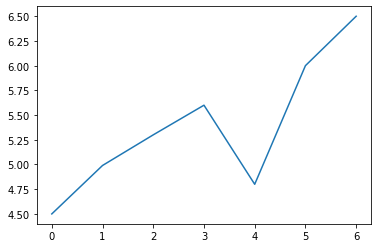

In [ ]:
plt.plot(gasolina.Preco)

In [ ]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

# generate points used to plot
x_plot = np.array(gasolina.Preco)

In [ ]:
# generate points
x = np.array(gasolina.Preco)

rng = np.random.RandomState(0)
rng.shuffle(x)

x = np.sort(x)
y = f(x)

In [ ]:
# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

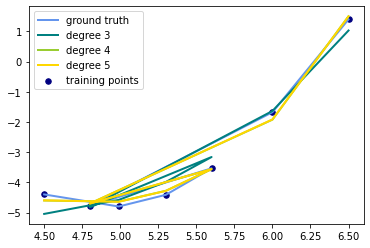

In [ ]:
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot),
         color='cornflowerblue',
         linewidth=lw,
         label="ground truth")

plt.scatter(x, y,
            color='navy',
            s=30,
            marker='o',
            label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    
    plt.plot(x_plot,
             y_plot,
             color=colors[count],
             linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='best')

In [ ]:
model

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)